Instructions To Run:
-----------------------------
Copy the DS_challenge.ipynb(source code) to the directory that has transactions.txt file.
After this you should be able to execute the notebook seamlessly.

**Question 1: Load**

Programmatically download and load into your favorite analytical tool the transactions data. This data, which is in line-delimited JSON format, can be found here
Please describe the structure of the data. Number of records and fields in each record?
Please provide some additional basic summary statistics for each field. Be sure to include a count of null, minimum, maximum, and unique values where appropriate.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
transaction_data = pd.read_json (r'transactions.txt',lines=True)

In [3]:
transaction_data.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,,0.0,,,,False,,,False,False
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,,0.0,,,,True,,,False,False
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,,0.0,,,,False,,,False,False
3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,,0.0,,,,False,,,False,False
4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,,0.0,,,,True,,,False,False


In [4]:
print(transaction_data.columns)
print(transaction_data.shape)
#Observation : The data given has 29 columns and 786363 rows in total.

Index(['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionDateTime', 'transactionAmount', 'merchantName',
       'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'echoBuffer', 'currentBalance', 'merchantCity',
       'merchantState', 'merchantZip', 'cardPresent', 'posOnPremises',
       'recurringAuthInd', 'expirationDateKeyInMatch', 'isFraud'],
      dtype='object')
(786363, 29)


In [5]:
##To get the number of non-empty values for each column. 
##This step helps us to identify the columns for which data doesn't exist at all

for col in transaction_data.columns:
    print(col, len(transaction_data[transaction_data[col] != '']))


C:\Users\vamsh\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


accountNumber 786363
customerId 786363
creditLimit 786363
availableMoney 786363
transactionDateTime 786363
transactionAmount 786363
merchantName 786363
acqCountry 781801
merchantCountryCode 785639
posEntryMode 782309
posConditionCode 785954
merchantCategoryCode 786363
currentExpDate 786363
accountOpenDate 786363
dateOfLastAddressChange 786363
cardCVV 786363
enteredCVV 786363
cardLast4Digits 786363
transactionType 785665
echoBuffer 0
currentBalance 786363
merchantCity 0
merchantState 0
merchantZip 0
cardPresent 786363
posOnPremises 0
recurringAuthInd 0
expirationDateKeyInMatch 786363
isFraud 786363


 **Observation:**
 
 We can observe that the following columns have no information: [echoBuffer, merchantCity, merchantState, merchantZip, posOnPremises, recurringAuthInd]
 These columns serve no use and can be dropped from the dataset.

In [6]:
transaction_data.drop(['echoBuffer', 'merchantCity', 'merchantState', 'merchantZip', 'posOnPremises', 'recurringAuthInd'], axis = 1, inplace = True)

In [7]:
#Number of unique values in each field
transaction_data.nunique()

accountNumber                 5000
customerId                    5000
creditLimit                     10
availableMoney              521915
transactionDateTime         776637
transactionAmount            66038
merchantName                  2490
acqCountry                       5
merchantCountryCode              5
posEntryMode                     6
posConditionCode                 4
merchantCategoryCode            19
currentExpDate                 165
accountOpenDate               1820
dateOfLastAddressChange       2184
cardCVV                        899
enteredCVV                     976
cardLast4Digits               5245
transactionType                  4
currentBalance              487318
cardPresent                      2
expirationDateKeyInMatch         2
isFraud                          2
dtype: int64

In [8]:
# To describe (min,max,count etc.) the distribution of the numerical fields in the dataset.
transaction_data.describe(include = [np.number])

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,cardCVV,enteredCVV,cardLast4Digits,currentBalance
count,7.863630e+05,7.863630e+05,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000
mean,5.372326e+08,5.372326e+08,10759.464459,6250.725369,136.985791,544.467338,544.183857,4757.417799,4508.739089
std,2.554211e+08,2.554211e+08,11636.174890,8880.783989,147.725569,261.524220,261.551254,2996.583810,6457.442068
min,1.000881e+08,1.000881e+08,250.000000,-1005.630000,0.000000,100.000000,0.000000,0.000000,0.000000
25%,3.301333e+08,3.301333e+08,5000.000000,1077.420000,33.650000,310.000000,310.000000,2178.000000,689.910000
50%,5.074561e+08,5.074561e+08,7500.000000,3184.860000,87.900000,535.000000,535.000000,4733.000000,2451.760000
75%,7.676200e+08,7.676200e+08,15000.000000,7500.000000,191.480000,785.000000,785.000000,7338.000000,5291.095000
max,9.993896e+08,9.993896e+08,50000.000000,50000.000000,2011.540000,998.000000,998.000000,9998.000000,47498.810000


In [9]:
##To osberve data types in the dataframe. transactionDateTime is converted from string to datatime format
print(transaction_data.dtypes)
transaction_data['transactionDateTime'] = pd.to_datetime(transaction_data['transactionDateTime'], infer_datetime_format=True)


accountNumber                 int64
customerId                    int64
creditLimit                   int64
availableMoney              float64
transactionDateTime          object
transactionAmount           float64
merchantName                 object
acqCountry                   object
merchantCountryCode          object
posEntryMode                 object
posConditionCode             object
merchantCategoryCode         object
currentExpDate               object
accountOpenDate              object
dateOfLastAddressChange      object
cardCVV                       int64
enteredCVV                    int64
cardLast4Digits               int64
transactionType              object
currentBalance              float64
cardPresent                    bool
expirationDateKeyInMatch       bool
isFraud                        bool
dtype: object


**Question 2: Plot** 

Plot a histogram of the processed amounts of each transaction, the transactionAmount column.
Report any structure you find and any hypotheses you have about that structure.

In [10]:
print(np.sum(transaction_data['accountNumber'] == transaction_data['customerId'])/len(transaction_data))
## all transactions have same accountNumber and customerId - this means the columns are duplicate and we can drop one

transaction_data.drop(['customerId'], axis = 1, inplace = True)

1.0


[Text(0, 0, 'PURCHASE'),
 Text(0, 0, 'ADDRESS_VERIFICATION'),
 Text(0, 0, 'REVERSAL'),
 Text(0, 0, '')]

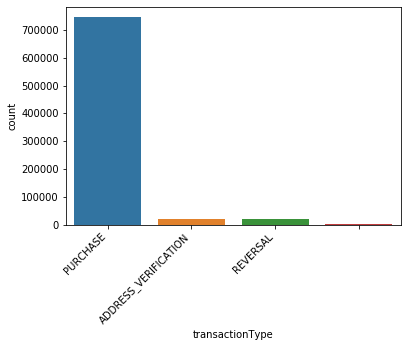

In [12]:
plot = sns.countplot(transaction_data['transactionType'])
plot.set_xticklabels(plot.get_xticklabels(), rotation=45,horizontalalignment='right')

#We can observe that there are three types of transactions - Purchase, Address verification (amt is 0), and Reversals.
#Majority are purchases

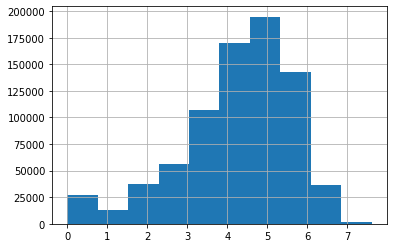

In [13]:
np.log1p(transaction_data['transactionAmount']).hist()
## histogram of log transformed values on x-axis. 

(array([6.02151e+05, 1.35834e+05, 3.56060e+04, 9.44000e+03, 2.41400e+03,
        6.76000e+02, 1.88000e+02, 4.30000e+01, 8.00000e+00, 3.00000e+00]),
 array([   0.   ,  201.154,  402.308,  603.462,  804.616, 1005.77 ,
        1206.924, 1408.078, 1609.232, 1810.386, 2011.54 ]),
 <a list of 10 Patch objects>)

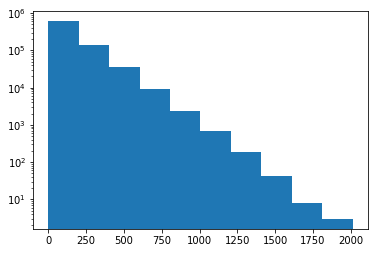

In [14]:
plt.hist(transaction_data['transactionAmount'], log=True)
## histogram with log frequency count plotted on y-axis

**Interesting observation:**

1. From the first histogram: chart is left skewed, that is left tail is longer. Large transaction amounts(right tail) are rare
2. From the second histogram: log of frequency count vs transaction values appears linear.That means transaction count is highest for small amounts and decreases exponentially as amount increases

**Question 3**: Data Wrangling - Duplicate Transactions
You will notice a number of what look like duplicated transactions in the data set. One type of duplicated transaction is a reversed transaction, where a purchase is followed by a reversal. Another example is a multi-swipe, where a vendor accidentally charges a customer's card multiple times within a short time span.

Can you programmatically identify reversed and multi-swipe transactions?
What total number of transactions and total dollar amount do you estimate for the reversed transactions? For the multi-swipe transactions? (please consider the first transaction to be "normal" and exclude it from the number of transactions and dollar amount counts)
Did you find anything interesting about either kind of transaction?

In [16]:
## Checking the duplicated transactions - this can be used to identify multi swipe transactions

transaction_data['is_duplicated'] = transaction_data.duplicated(['accountNumber','transactionAmount','merchantName','cardLast4Digits','merchantCategoryCode'])
transaction_data['is_duplicated'].sum()/len(transaction_data)


0.09452377591519438

In [17]:
## To identify multi swipe transaction
def time_diff(t1,t2):
    return(t1['transactionDateTime']-t2['transactionDateTime'] < pd.Timedelta(minutes=2))

new_col = transaction_data[transaction_data['is_duplicated']].sort_values('transactionDateTime').groupby(['accountNumber','transactionAmount','merchantName','cardLast4Digits','merchantCategoryCode'],as_index=False)\
.apply(lambda x : time_diff(x.iloc[-1],x))

transaction_data['is_multiswipe'] =  new_col.reset_index(level=0, drop=True)

transaction_data['is_multiswipe'].fillna(False, inplace = True)
print(sum(transaction_data['is_multiswipe']))


35427


**Observations:**

About 9.45% of the total transactions are duplicates. Assuming transactions can be unqiuely identified by 'accountNumber','transactionAmount','merchantName','cardLast4Digits','merchantCategoryCode' fields.

A total of 35,427 transactions are likely to be multiswipe transactions, that can be removed from the dataset.
Assumptions: 
1. Multi swipe transactions can be identified using the following columns: 'accountNumber','transactionAmount','merchantName','cardLast4Digits','merchantCategoryCode' and are with in 2 minutes of time.
2. I'm assuming these columns can uniquely identify transactions within 2 minutes of time. While it is possible that a customer makes the exact same transaction with a merchant within 2 minutes, it is some what unlikely. The 2 minutes can be further reduced or increased based on real world data analysis and experience

In [18]:
## To identify reverse transactions in the data set
# The data set already has a field 'transactionType' that identifies reversals, so using this we can filter the transactions
transaction_data[transaction_data['transactionType'] == "REVERSAL"]

,accountNumber,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,...,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,is_duplicated,is_multiswipe
39,574788567,2500,2200.98,2016-05-24 01:38:03,215.13,Convenient Tire,US,US,09,01,...,206,206,8522,REVERSAL,299.02,True,False,False,True,True
73,574788567,2500,2432.72,2016-10-07 10:23:57,3.87,Eazy Repair,US,US,05,01,...,579,579,4219,REVERSAL,67.28,True,False,False,False,False
101,924729945,50000,49831.43,2016-10-19 14:01:45,168.57,discount.com,US,US,05,01,...,205,265,9459,REVERSAL,168.57,False,False,False,True,True
133,984504651,50000,46367.41,2016-01-16 09:53:15,450.74,Planet Fitness #849960,US,US,05,01,...,640,640,8332,REVERSAL,3632.59,False,False,False,True,True
156,984504651,50000,41909.30,2016-01-25 20:39:15,81.73,AMC #724446,US,US,09,01,...,640,640,8332,REVERSAL,8090.70,True,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786106,899818521,2500,968.33,2016-09-29 02:04:32,10.05,cheapfast.com,US,US,02,99,...,421,421,3424,REVERSAL,1531.67,False,False,False,False,False
786120,638498773,10000,9798.21,2016-01-01 19:48:03,201.79,KFC #928167,US,US,05,01,...,175,175,321,REVERSAL,201.79,True,False,False,True,True
786219,638498773,10000,5331.33,2016-11-03 04:23:26,86.14,Dunkin' Donuts #396342,US,US,05,01,...,387,387,4635,REVERSAL,4668.67,True,False,False,True,True
786225,638498773,10000,4393.10,2016-11-06 22:54:25,49.39,Shake Shack #118502,US,US,05,01,...,387,387,4635,REVERSAL,5606.90,True,False,False,False,False


**Observations:**

- We can identify the reversed transactions in the data using transactionType column. However I do not know if the data set contains actual transactions that correspond to these reversed.

- Assuming, the data set contains some or all corresponding original transactions - the below code is used to find these transactions.

In [19]:
def check_reverse(df1, df2):
    """Find transactions which are common between the two dataframes (reversed and non-reversed)"""

    rev = pd.merge(df1, df2, how='inner')
    print( "no of reversed: ", len(df1), "\n", "no of non-reversed: ", len(df2), "\n", "no of common transactions: ", len(rev))
    return rev

reverse = check_reverse(transaction_data[transaction_data['transactionType'] == "REVERSAL"][['accountNumber','transactionAmount','merchantName','cardLast4Digits','merchantCategoryCode','posEntryMode']] ,\
                        transaction_data[(transaction_data['transactionType'] != "REVERSAL") & (transaction_data['is_multiswipe'] == False)][['accountNumber','transactionAmount','merchantName','cardLast4Digits','merchantCategoryCode','posEntryMode']])


no of reversed:  20303 
 no of non-reversed:  748765 
 no of common transactions:  19402


In [20]:

print("Reversed_Transactions # ","Total_Amount")
print(len(reverse),"\t", round(sum(reverse['transactionAmount']),2))


Reversed_Transactions #  Total_Amount
19402 	 2692947.22


**Assumptions:** 

- Original of the reversed transactions can be identified using the following columns: 'accountNumber','transactionAmount','merchantName','cardLast4Digits','merchantCategoryCode','posEntryMode'. These columns will be the same and the transaction type should be other than reversal.
 
**Observations:**
- No of reversals identified in the data set: 20303. Transaction amount corresponding to these: 2,692,947.22
- No of corresponding original transactions identified in the data set: 19402
- Based on the assumptions, there are lower number of original transactions than reversals.

Text(0.5, 1.0, 'All transactions')

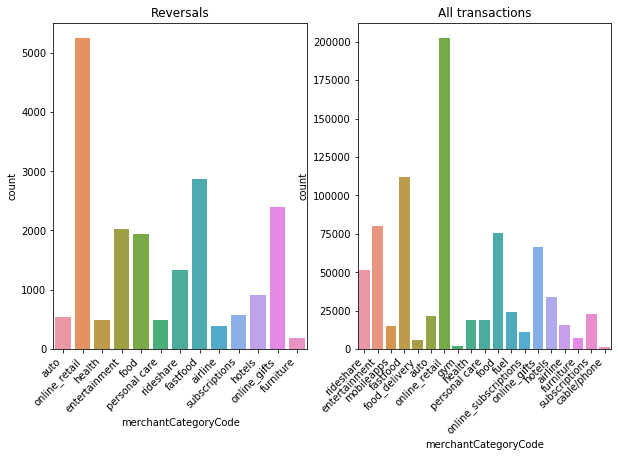

In [21]:
# Plot to see if the reversed transactions are predominant in any merchant category

fig, axs = plt.subplots(figsize=(10,6), ncols=2)

rev = sns.countplot(reverse.merchantCategoryCode, ax = axs[0])
rev.set_xticklabels(rev.get_xticklabels(), rotation=45,horizontalalignment='right')
axs[0].set_title('Reversals')


full = sns.countplot(transaction_data.merchantCategoryCode, ax = axs[1])
full.set_xticklabels(full.get_xticklabels(), rotation=45, horizontalalignment='right')
axs[1].set_title('All transactions')

**Interesting observations:**
1. online gifts category has higher rate of reversals
2. some categories like fuel, mobileapps, auto, food delivery, gym, cable/phone have no reversals

**Question 4: Model**

Fraud is a problem for any bank. Fraud can take many forms, whether it is someone stealing a single credit card, to large batches of stolen credit card numbers being used on the web, or even a mass compromise of credit card numbers stolen from a merchant via tools like credit card skimming devices.

Each of the transactions in the dataset has a field called isFraud. Please build a predictive model to determine whether a given transaction will be fraudulent or not. Use as much of the data as you like (or all of it).
Provide an estimate of performance using an appropriate sample, and show your work.
Please explain your methodology (modeling algorithm/method used and why, what features/data you found useful, what questions you have, and what you would do next with more time)

In [22]:
# In the data set to build the fraud model I'm assuming the address verification and reversal transaction types...
# are not useful as the objective is to find fraud purchases
# In addition also removing the multiswipe transactions as earlier we found these are duplicate

model_data = transaction_data[transaction_data['transactionType'] == "PURCHASE"]
model_data = model_data[~model_data['is_multiswipe']]

len(model_data)

730046

In [23]:
model_data.columns

Index(['accountNumber', 'creditLimit', 'availableMoney', 'transactionDateTime',
       'transactionAmount', 'merchantName', 'acqCountry',
       'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'currentBalance', 'cardPresent',
       'expirationDateKeyInMatch', 'isFraud', 'is_duplicated',
       'is_multiswipe'],
      dtype='object')

**Examining features that can be useful to predit fraud:**

1. Of the available fields 'accountNumber', 'cardLast4Digits' clearly are not useful features
2. 'creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance' are numeric features that can provide useful information
3. 'merchantName', 'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode', 'merchantCategoryCode', 'cardPresent', 'expirationDateKeyInMatch' are labels which can also provide useful information but need to be encoded to use in the model
4. 'currentExpDate', 'accountOpenDate', 'dateOfLastAddressChange' could be useful in combination with 'transactionDateTime'. Difference of these dates with transaction date can be used as an input feature
5. We can also extract time of the day from 'transactionDateTime', which could be useful. Expect to see more fraud transactions in unusual times.
6. 'cardCVV', 'enteredCVV' - can be used by checking if there is a match between them or not. Expect to have more mismatches in case of fraud
7. 'acqCountry', 'merchantCountryCode' - a feature can be constructed to check if they match. Expect to have more mismatches in case of fraud
8. As we only focus on single 'transactionType' - this feature can be dropped
9. 'isFraud' is the categorical variable to predict


In [24]:
### Feature engineering -  as discussed above ###

model_data['currentExpDate_diff'] = (pd.to_datetime(model_data['currentExpDate']) - model_data['transactionDateTime'])/np.timedelta64(1, 'D')
model_data['accountOpenDate_diff'] = (pd.to_datetime(model_data['accountOpenDate']) - model_data['transactionDateTime'])/np.timedelta64(1, 'D')
model_data['dateOfLastAddressChange_diff'] = (pd.to_datetime(model_data['dateOfLastAddressChange']) - model_data['transactionDateTime'])/np.timedelta64(1, 'D')
model_data['transactionTimeinDay'] = (model_data['transactionDateTime'] - model_data['transactionDateTime'].dt.normalize())//np.timedelta64(1, 'h')
model_data['Country_match'] = (model_data['acqCountry'] == model_data['merchantCountryCode'])
model_data['CVVmatch'] = (model_data['cardCVV'] == model_data['enteredCVV'])

# Drop the unwanted columns
model_data = model_data.drop(['accountNumber', 'cardLast4Digits', 'is_duplicated', 'is_multiswipe', 'transactionType', 'currentExpDate',\
                 'accountOpenDate', 'dateOfLastAddressChange','transactionDateTime', 'cardCVV', 'enteredCVV', ], axis = 1)

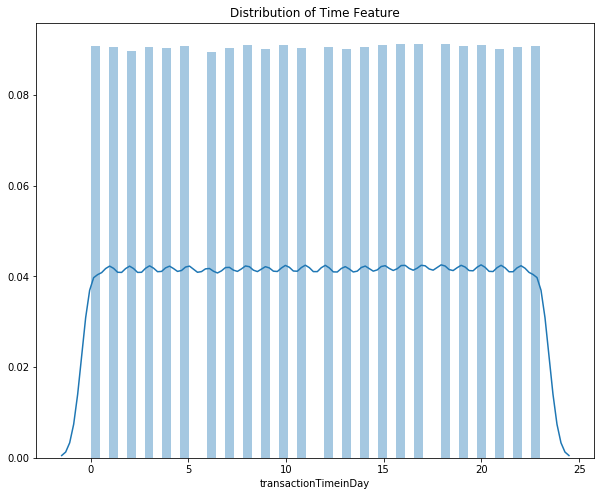

In [25]:
#Distribution of transactions by time
model_data['transactionTimeinDay']

plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(model_data['transactionTimeinDay'])


**Observations:**

- The dsitribution plot implies the transactions are quite evenly distributed in time.
- This is not expected in real world, and could be a sign that the dataset is manipulated

In [26]:
# Building a model on the whole dataset

from sklearn.model_selection import train_test_split

y = model_data['isFraud']
X = model_data

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

print("Number transactions in train dataset: ", len(X_train))
print("Number transactions in test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))

print("Fraction of frauds in the dataset: {:.5f}".format(np.sum(y)/len(y)))


Number transactions in train dataset:  511032
Number transactions in test dataset:  219014
Total number of transactions:  730046
Fraction of frauds in the dataset: 0.01615


**Observations:**

From above we can observe that the Fraction of frauds in the dataset is only 0.01615 (~1.6%). 
I tried to fit a model using the above dataset but the model is very weak in predicting fraud.

A balanced class distribution could give a more reasonable model. I created a balanced class distribution below by selecting equal number of fraud and non-fraud transactions for the test data set.

In [27]:
non_fraud = X_train[X_train['isFraud'] == False]
fraud = X_train[X_train['isFraud'] == True]
print(len(fraud))
sample = non_fraud.sample(len(fraud))

8335


In [28]:
X_train_bal = pd.concat([sample.reset_index(drop=True), fraud.reset_index(drop=True)])

##Shuffling the data
X_train_bal = X_train_bal.sample(frac=1).reset_index(drop=True)

print(len(X_train_bal))

y_train_bal = X_train_bal['isFraud']


16670


                              creditLimit  availableMoney  transactionAmount  \
creditLimit                      1.000000        0.824610           0.004011   
availableMoney                   0.824610        1.000000           0.001580   
transactionAmount                0.004011        0.001580           1.000000   
currentBalance                   0.666608        0.128013           0.004950   
cardPresent                     -0.029159       -0.018929          -0.104263   
expirationDateKeyInMatch         0.003645       -0.000718          -0.010157   
isFraud                          0.024471       -0.001216           0.238141   
currentExpDate_diff              0.006903        0.013667           0.012700   
accountOpenDate_diff             0.087800        0.035610           0.005995   
dateOfLastAddressChange_diff     0.073520       -0.029093           0.032073   
transactionTimeinDay             0.005853        0.002393           0.002648   
Country_match                    0.00838

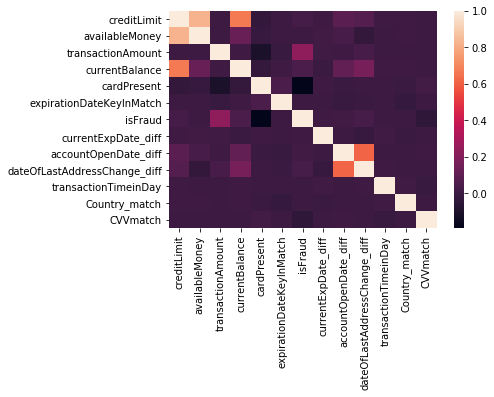

In [29]:
print(X_train_bal.corr())
sns.heatmap(X_train_bal.corr())

Number of fraud transactions in the model = 8335. 

Total size of the balanced training set = 16670

                              creditLimit  availableMoney  transactionAmount  \
creditLimit                      1.000000        0.834627           0.005007   
availableMoney                   0.834627        1.000000          -0.010816   
transactionAmount                0.005007       -0.010816           1.000000   
currentBalance                   0.653571        0.128595           0.023877   
cardPresent                     -0.005285        0.001229           0.011490   
expirationDateKeyInMatch         0.002148        0.003897           0.000676   
isFraud                          0.003160       -0.001365           0.074314   
currentExpDate_diff              0.001246        0.004805           0.001223   
accountOpenDate_diff             0.061583        0.021312           0.006906   
dateOfLastAddressChange_diff     0.062974       -0.041121           0.029154   
transactionTimeinDay            -0.001783       -0.003314           0.000735   
Country_match                   -0.00083

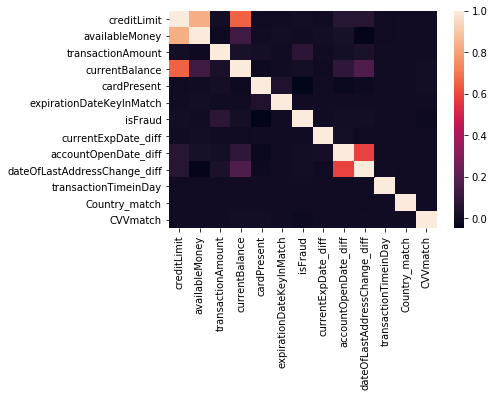

In [30]:
#plotting the correlations between the variables

print(model_data.corr())
sns.heatmap(model_data.corr())

**Observations:**

From the correlations (both of the whole data set and balanced training set) I observed that features with some correlation with 'isfraud' are 'transactionAmount', 'cardPresent' and 'CVVmatch'. The balanced data set had some what higher correlation. The remaining features are observed to have very low correlation.
Given the low correlations, expect to see a weak model using the features as is.


In [31]:
# dropping the prediction variable from X
X_train_bal = X_train_bal.drop('isFraud', axis =1)
X_test = X_test.drop('isFraud', axis =1)

########## Label Encoding for Training and Test Data #########
from sklearn.preprocessing import LabelEncoder

for i in X_train_bal.columns:
    if X_train_bal[i].dtype=='object' :
        LE = LabelEncoder()
        LE.fit(list(X_train_bal[i].values) )
        X_train_bal.loc[:,i] = LE.transform(list(X_train_bal[i].values))

for i in X_test.columns:
    if X_test[i].dtype=='object' :
        LE = LabelEncoder()
        LE.fit(list(X_test[i].values) )
        X_test.loc[:,i] = LE.transform(list(X_test[i].values))

X_train_bal = X_train_bal.fillna(-999)
X_test = X_test.fillna(-999)


**Notes:**

- In Fraud models, the predicted variable is binary (is fraud or not), therefore we need to use binary classifiers.
- Logistic regression is the classic model of choice in such cases. However, ensemble approaches such as Random forest and boosting techniques offer a better performance at the risk of overfitting. 

- If we have enough data overfitting can somewhat be alleviated using a separate validation data set. Due to the time constraint, I did not use a separate validation data set. A separate test dataset is used to assess performance.

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier as GB

############ Fitting Logistic regression Model #########
LR_clf = LogisticRegression(random_state=0, max_iter= 10000).fit(X_train_bal, y_train_bal)

############ Fitting Random Forest Model #########
RF_clf = RandomForestClassifier(max_depth=10, random_state=0, n_estimators=30, max_features=0.3, min_samples_leaf=20, n_jobs=-1, verbose=1)
RF_clf.fit(X_train_bal, y_train_bal)

############ Fitting Gradient Boosting Classifier #########

gb_clf = GB().fit(X_train_bal, y_train_bal)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.1s finished


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  30 out of  30 | elapsed:    0.1s finished


Accuracy: 0.7292867122649693
Confusion matrix: [[157425  58136]
 [  1154   2299]]
F1 score: 0.07196969696969696


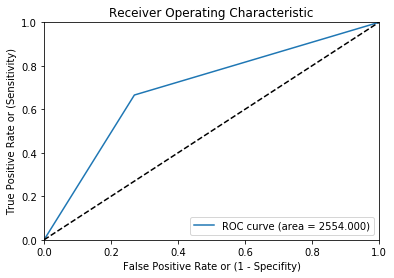

In [34]:
######## Predicting with Random Forest model on test dataset ##########

from sklearn.metrics import accuracy_score

RF_predicted = RF_clf.predict(X_test)
print ("Accuracy:", accuracy_score(y_test, RF_predicted))

from sklearn.metrics import confusion_matrix
print("Confusion matrix:", confusion_matrix(y_test, RF_predicted))

from sklearn.metrics import f1_score
print ("F1 score:", f1_score(y_test, RF_predicted))

from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, RF_predicted)
roc_auc = auc(y_test, RF_predicted)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")


Accuracy: 0.6822668870483165
Confusion matrix: [[147408  68153]
 [  1435   2018]]
F1 score: 0.05481908073454308


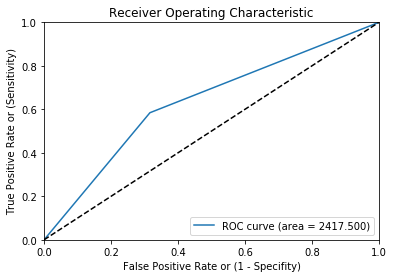

In [35]:
######## Predicting with Logistic regression model on test dataset ##########

LR_predicted = LR_clf.predict(X_test)
print ("Accuracy:", accuracy_score(y_test, LR_predicted))
print("Confusion matrix:", confusion_matrix(y_test, LR_predicted))
print("F1 score:", f1_score(y_test, LR_predicted))

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, LR_predicted)
roc_auc = auc(y_test, LR_predicted)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

Accuracy: 0.7219812432081968
Confusion matrix: [[155785  59776]
 [  1114   2339]]
F1 score: 0.07134577842850172


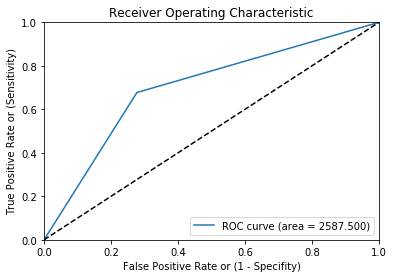

In [36]:
GB_predicted = gb_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, GB_predicted))
print("Confusion matrix:", confusion_matrix(y_test, GB_predicted))
print("F1 score:", f1_score(y_test, GB_predicted))

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, GB_predicted)
roc_auc = auc(y_test, GB_predicted)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

**Conclusion:**

- From the above ROC charts and performance metrics, Random Forest classifier performs slightly better than GBM and Logistic regression. However, the overall accuracy is poor due to high number of False positives. 
- This is likely because the balanced training dataset had a high number of frauds than the test set. 
- Low correlation with the features is also another reason for the poor fit & performance.


**Things than can be improved, but didn't have time:**

1. Feature engineering: Various transformations, combinations of the features could be tried. (eg: ratio of balance & limit, log of transaction amount, etc.)
2. Cross validation (on a seperate data set) could be performed to optimize model selection
3. Bias-Variance analysis to see if additional data or features are required to improve model performance
4. Tuning of hyperparameteres for the classifiers.
5. Other ensemble techniques such as LightGBM, decision tress can be used.
6. Neural Networks could be very useful for fraud modelling, especially in cases where feature relationships are not easily understood

**Some questions I have:**
1. How is the transaction authorized if cardCVV and enteredCVV are different? Not sure if this is fraud.
2. Is fraud prediction used for Address verification transaction types? (Assumed it is not relevant and excluded for model building )


